In [2]:
%matplotlib inline
import math
import time
import numpy as np
from myPkg import myPlot as d2l 
import scipy.io as sio
import os
from tqdm import tqdm


In [39]:
data = sio.loadmat(r'H:\Semiconductor\Code_zoo\SSVEP算法\result\TRCA\S1.mat')
print("数据类型")
data.keys()

数据类型


dict_keys(['__header__', '__version__', '__globals__', 'accs', 'itrs'])

In [40]:
accs = data['accs']
itrs = data['itrs']

S1的结果


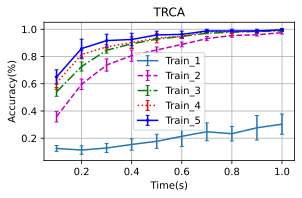

In [41]:
print("S1的结果")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[i,:,:].mean(0) for i in params ] ,
         [accs[i,:,:].std(0) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy(%)', 
         
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA"
        )

## TRCA

In [42]:
# Base path to your data files
base_path = r'H:\Semiconductor\Code_zoo\SSVEP算法\result\TRCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_trca = accs;
itr_trca = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3194.65it/s]


In [43]:
print(f"数据类型{accs.shape}")
# accs[:,4,:,:].mean(1).std(0)

数据类型(35, 5, 6, 10)


平均的结果
Accuracy


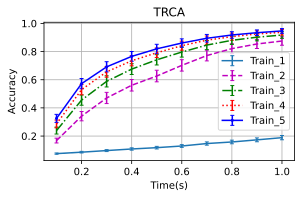

ITR


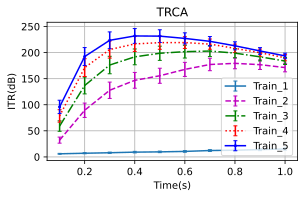

In [44]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA",
        saveName="TRCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA",
        saveName="TRCA_ITR"
        )

TRCA 0.5s  219.67 ± 12.47 bpm

TDCA 0.5s  244.34 ± 10.84 bpm  Nk = 7,  l = 4.

In [45]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.7658 ,ITR = 231.92 bit/min


## TDCA

In [46]:
# Base path to your data files
base_path = r'H:\Semiconductor\Code_zoo\SSVEP算法\result\TDCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)
acc_tdca = accs;
itr_tdca = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3195.42it/s]


平均的结果
Accuracy


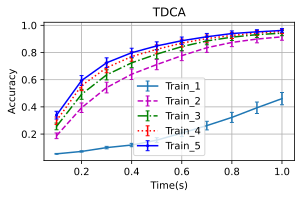

ITR


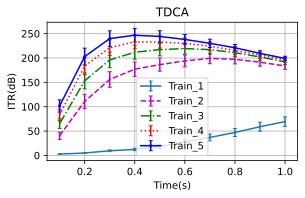

In [47]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA",
        saveName="TDCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA",
        saveName="TDCA_ITR"
        )

In [48]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.7985 ,ITR = 246.80 bit/min


Compare

## TRCA-SAME

In [49]:
# Base path to your data files
base_path = r'H:\Semiconductor\Code_zoo\SSVEP算法\result\TRCA-SAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)
acc_trca_same = accs;
itr_trca_same = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 2703.86it/s]


平均的结果
Accuracy


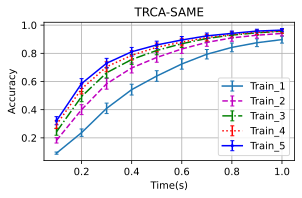

ITR


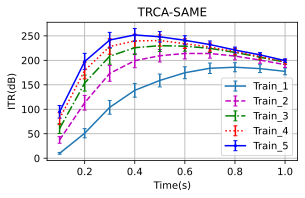

In [50]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-SAME",
        saveName="TRCA-SAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-SAME",
        saveName="TRCA-SAME_ITR"
        )

In [51]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.8111 ,ITR = 251.94 bit/min


## TDCA_SAME

In [52]:
# Base path to your data files
base_path = r'H:\Semiconductor\Code_zoo\SSVEP算法\result\TDCA-SAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_tdca_same = accs;
itr_tdca_same = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 2928.81it/s]


平均的结果
Accuracy


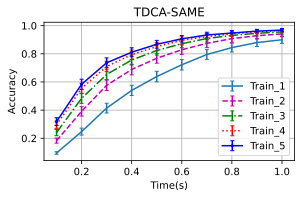

ITR


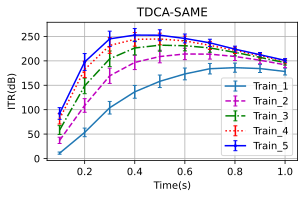

In [53]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-SAME",
        saveName="TDCA-SAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TDCA-SAME",
        saveName="TDCA-SAME_ITR"
        )

In [54]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.8113 ,ITR = 252.78 bit/min


## msTRCA

In [55]:
# Base path to your data files
base_path = r'H:\Semiconductor\Code_zoo\SSVEP算法\result\msTRCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_mstrca = accs;
itr_mstrca = itrs;

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3514.16it/s]


平均的结果
Accuracy


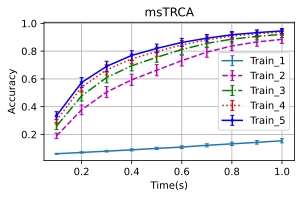

ITR


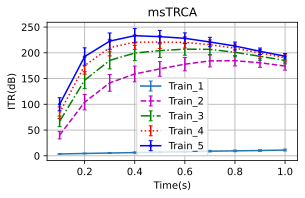

In [56]:
print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msTRCA",
        saveName="msTRCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msTRCA",
        saveName="msTRCA_ITR"
        )

In [57]:
n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

t = 0.4 时,Acc = 0.7694 ,ITR = 233.19 bit/min


## mseCCA

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3513.99it/s]

平均的结果
Accuracy


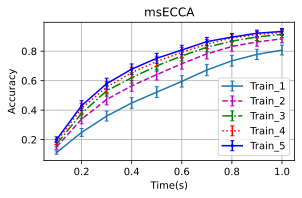

ITR


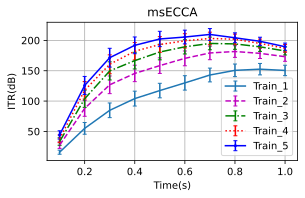

t = 0.7000000000000001 时,Acc = 0.8651 ,ITR = 209.79 bit/min


In [58]:
# Base path to your data files
base_path = r'H:\Semiconductor\Code_zoo\SSVEP算法\result\mseCCA'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_msecca = accs;
itr_msecca = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msECCA",
        saveName="msECCA_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="msECCA",
        saveName="msECCA_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## 

## TRCAR

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 3515.17it/s]

平均的结果
Accuracy


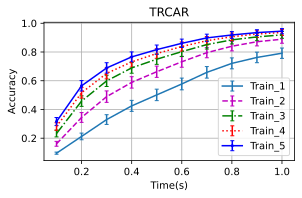

ITR


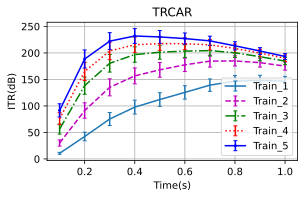

t = 0.4 时,Acc = 0.7658 ,ITR = 231.95 bit/min


In [59]:
# Base path to your data files
base_path = r'D:\Liuke\Git\BCI_Algorithms\result\TRCAR'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_trcaR= accs;
itr_trcaR = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCAR",
        saveName="TRCAR_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCAR",
        saveName="TRCAR_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## TRCA-msSAME

加载35人数据


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 2929.16it/s]

平均的结果
Accuracy


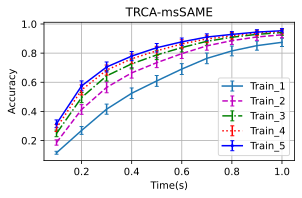

ITR


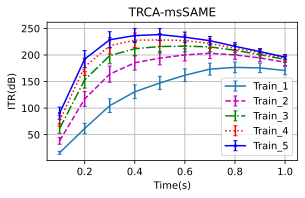

t = 0.5 时,Acc = 0.8374 ,ITR = 238.41 bit/min


In [6]:
# Base path to your data files
base_path = r'D:\Liuke\Git\BCI_Algorithms\result\TRCA-msSAME'
sub_num = 35
print(f"加载{sub_num}人数据")

# Initialize a list to store data for all subjects
subject_data = []
accs = []
itrs = []
# Loop through 10 subjects (S1.mat to S10.mat)
for i in tqdm(range(1, sub_num+1)):
    file_path = os.path.join(base_path, f'S{i}.mat')  # Construct the file path for each subject
    data = sio.loadmat(file_path)                     # Load the .mat file
    subject_data.append(data)                         # Append the loaded data to the list
    accs .append (data['accs'])
    itrs .append (data['itrs'])
    # print(f"Loaded data for S{i}")
accs = np.array(accs)
itrs = np.array(itrs)

acc_trca_msSAME= accs;
itr_trca_msSAME = itrs;

print("平均的结果")
print("Accuracy")

params =range(5)
time_points = np.linspace(0.1,1,10)
d2l.plot(time_points,
         [accs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [accs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='Accuracy', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-msSAME",
        saveName="TRCA-msSAME_Acc"
        )

print("ITR")
d2l.plot(time_points,
         [itrs[:,i,:,:].mean( axis=(0,1)) for i in params ] ,
         [itrs[:,i,:,:].mean(1).std(0)/np.sqrt(sub_num-1) for i in params],
          xlabel='Time(s)',
         ylabel='ITR(dB)', 
         figsize=(4.5, 2.5),
         xlim=[0.05,1.05],
         legend=[f'Train_{mu+1}' for mu in params],
        titles="TRCA-msSAME",
        saveName="TRCA-msSAME_ITR"
        )

n = np.argmax(itrs[:,4,:,:].mean( axis=(0,1)))
acc_max = accs[:,4,:,n].mean( axis=(0,1))
itr_max = itrs[:,4,:,:].mean( axis=(0,1)).max()
print(f"t = {(1+n)*0.1} 时,Acc = {acc_max:.4f} ,ITR = {itr_max:.2f} bit/min")

## Compare

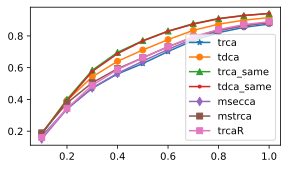

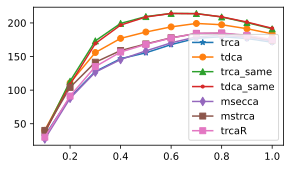

In [63]:
import matplotlib.pyplot as plt
ntrain = 1
plt.figure()
plt.plot(time_points,acc_trca[:,ntrain,:,:].mean(axis=(0, 1)),label="trca",marker = '*')
plt.plot(time_points,acc_tdca[:,ntrain,:,:].mean(axis=(0, 1)),label="tdca",marker = 'o')
plt.plot(time_points,acc_trca_same[:,ntrain,:,:].mean(axis=(0, 1)),label="trca_same",marker = '^')
plt.plot(time_points,acc_tdca_same[:,ntrain,:,:].mean(axis=(0, 1)),label="tdca_same",marker = '.')
plt.plot(time_points,acc_msecca[:,ntrain,:,:].mean(axis=(0, 1)),label="msecca",marker = 'd')
plt.plot(time_points,acc_mstrca[:,ntrain,:,:].mean(axis=(0, 1)),label="mstrca",marker = 's')
plt.plot(time_points,acc_trcaR[:,ntrain,:,:].mean(axis=(0, 1)),label="trcaR",marker = 's')
plt.legend()
plt.show()

plt.figure()
plt.plot(time_points,itr_trca[:,ntrain,:,:].mean(axis=(0, 1)),label="trca",marker = '*')
plt.plot(time_points,itr_tdca[:,ntrain,:,:].mean(axis=(0, 1)),label="tdca",marker = 'o')
plt.plot(time_points,itr_trca_same[:,ntrain,:,:].mean(axis=(0, 1)),label="trca_same",marker = '^')
plt.plot(time_points,itr_tdca_same[:,ntrain,:,:].mean(axis=(0, 1)),label="tdca_same",marker = '.')
plt.plot(time_points,itr_msecca[:,ntrain,:,:].mean(axis=(0, 1)),label="msecca",marker = 'd')
plt.plot(time_points,itr_mstrca[:,ntrain,:,:].mean(axis=(0, 1)),label="mstrca",marker = 's')
plt.plot(time_points,itr_trcaR[:,ntrain,:,:].mean(axis=(0, 1)),label="trcaR",marker = 's')
plt.legend()
plt.show()